In [29]:
import xarray as xr
import numpy as np
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

dirpath = '/local/data/sic_nsidc_cdr/v04r00/'
grid_sic = xr.open_dataset('/local/data/sic_nsidc_cdr/gridfile_sic.nc')

mm_sic = xr.open_dataset(dirpath + 'seaice_conc_monthly_sh_201401-202012_v04r00_merged.nc')
clim_sic = xr.open_dataset(dirpath + 'seaice_conc_monthly_clim_sh_201401-202012_v04r00_merged.nc')
dirpath2 = '/local/data/sic_nsidc_cdr/'

lon = grid_sic.lon
lat = grid_sic.lat

mm_sic

<xarray.Dataset>
Dimensions:                  (time: 84, x: 316, y: 332)
Coordinates:
  * time                     (time) datetime64[ns] 2014-01-01 ... 2020-12-01
Dimensions without coordinates: x, y
Data variables:
    projection               int32 ...
    cdr_seaice_conc_monthly  (time, y, x) float32 ...
Attributes: (12/44)
    CDI:                       Climate Data Interface version 1.9.3 (http://m...
    history:                   Mon Jul 19 04:07:48 2021: cdo mergetime seaice...
    source:                    ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G0...
    institution:               NSIDC > National Snow and Ice Data Center
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    ...                        ...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2021-06-22T16:55:56Z
    time_coverage_start:       2014-01-01T00:00:00Z
    time_coverage_end:         2014-01-31T23:59:59Z
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    CDO:                       Climate Data Operators version 1.9.3 (http://m...

[0.15]


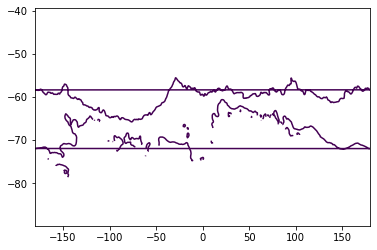

In [25]:
sep_2014 = mm_sic.cdr_seaice_conc_monthly[8].values
feb_2014 = mm_sic.cdr_seaice_conc_monthly[1].values

np.set_printoptions(threshold=np.inf)

sep_2014[sep_2014>1]=np.nan
feb_2014[feb_2014>1] = np.nan
contour = plt.contour(lon, lat, sep_2014, levels=[0.15])
plt.contour(lon, lat, feb_2014, levels=[0.15])
print(contour.levels)
#plt.colorbar();


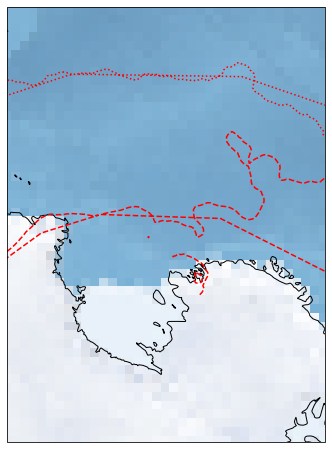

In [28]:
import cartopy.crs as ccrs
import cartopy
import pandas as pd
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Stereographic(central_longitude = '-165'))
ax.stock_img()
ax.coastlines()
ax.set_extent([170, 225, -90, -50])

ax.contour(lon, lat, feb_2014, levels=[0.15], colors="red", linestyles='dashed', transform=ccrs.PlateCarree())
ax.contour(lon, lat, sep_2014, levels=[0.15], colors="red", linestyles='dotted', transform=ccrs.PlateCarree())
